In [11]:
#!pip install yfinance
#!pip install pmdarima
#import yfinance as fy

from pmdarima.arima import auto_arima



In [6]:
import pandas as pd
import matplotlib as plt
import numpy as np
import math 
#from sklearn

df = pd.read_csv(r'F:\Software Eng\Semester8\2-Final\4-Data Science Lab\2-Assignments\Lab-8\DataSet\NSE-TATAGLOBAL.csv')
df.head

<bound method NDFrame.head of             Date    Open    High     Low    Last   Close   
0     2018-09-28  234.05  235.95  230.20  233.50  233.75  \
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  

2. Predicting Stock Prices: using ARIMA

In [12]:
import yfinance as yf
# Download data
gs = yf.download("GS", start="2011-01-01", end="2021-01-01")

[*********************100%%**********************]  1 of 1 completed


In [15]:
import pandas as pd
# Preprocess data
dataset_ex_df = gs.copy()
dataset_ex_df = dataset_ex_df.reset_index()
dataset_ex_df['Date'] = pd.to_datetime(dataset_ex_df['Date'])
dataset_ex_df.set_index('Date', inplace=True)
dataset_ex_df = dataset_ex_df['Close'].to_frame()

In [16]:
from pmdarima.arima import auto_arima
# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(dataset_ex_df['Close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12944.119, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12965.532, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12950.184, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12952.296, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12963.855, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12942.196, Time=1.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12941.178, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12941.872, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12943.669, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12943.203, Time=1.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=12939.507, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12950.671, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=12940.534, Time=0.63 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=12940.216, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
# Define the ARIMA model
def arima_forecast(history):
 # Fit the model
 model = ARIMA(history, order=(0,1,0))
 model_fit = model.fit()
 
 # Make the prediction
 output = model_fit.forecast()
 yhat = output[0]
 return yhat
# Split data into train and test sets
X = dataset_ex_df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
 # Generate a prediction
 yhat = arima_forecast(history)
 predictions.append(yhat)
 # Add the predicted value to the training set
 obs = test[t]
 history.append(obs)

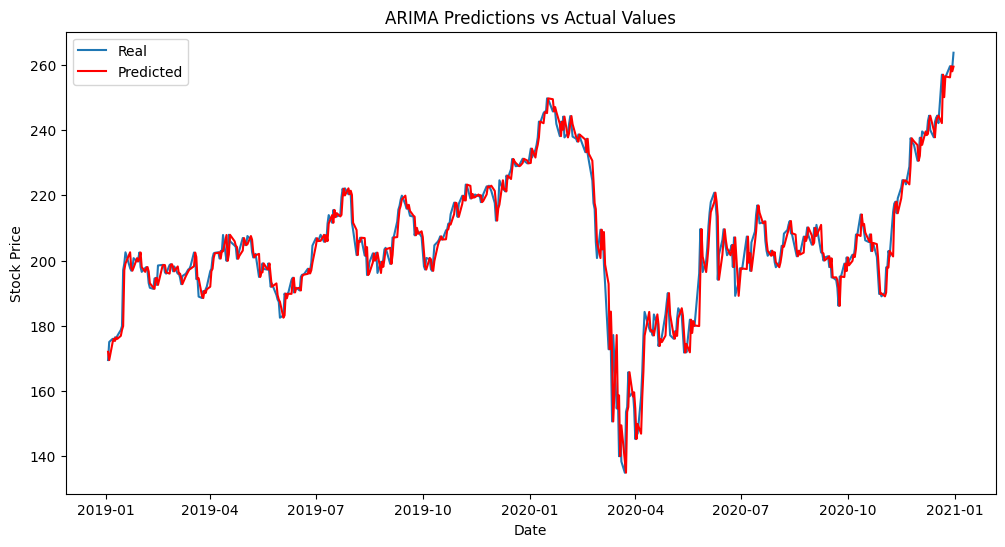

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(dataset_ex_df.iloc[size:,:].index, test, label='Real')
plt.plot(dataset_ex_df.iloc[size:,:].index, predictions, color='red', 
label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 3. Stock price forecasting using Sarima

In [21]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from pmdarima import auto_arima
from datetime import datetime, timedelta
import numpy as np

                                              0.0/16.4 MB ? eta -:--:--
                                              0.0/16.4 MB ? eta -:--:--
                                              0.0/16.4 MB ? eta -:--:--
                                              0.0/16.4 MB ? eta -:--:--
                                              0.0/16.4 MB ? eta -:--:--
                                              0.0/16.4 MB ? eta -:--:--
                                              0.0/16.4 MB ? eta -:--:--
                                              0.0/16.4 MB ? eta -:--:--
                                             0.1/16.4 MB 273.8 kB/s eta 0:01:00
                                             0.1/16.4 MB 273.8 kB/s eta 0:01:00
                                             0.1/16.4 MB 206.9 kB/s eta 0:01:19
                                             0.1/16.4 MB 206.9 kB/s eta 0:01:19
                                             0.1/16.4 MB 206.9 kB/s eta 0:01:19
                        


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\bismillah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [22]:
# Function to download stock data
def download_stock_data(ticker):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=180) # Approximate 6 months
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

In [24]:
# Function to forecast stock prices using SARIMA
def forecast_stock_sarima(stock_data):
    model = auto_arima(stock_data, seasonal=True, m=5, d=1, D=1,
    trace=False, error_action='ignore', 
    suppress_warnings=True)
    forecast = model.predict(n_periods=60)
    return forecast
# Download stock data
ticker = 'AAPL'
stock_data = download_stock_data(ticker)
# Forecast stock prices using SARIMA
forecast = forecast_stock_sarima(stock_data)
# Create the graph
fig = go.Figure(data=[
go.Scatter(x=stock_data.index, y=stock_data, name='Actual'),
go.Scatter(x=pd.date_range(stock_data.index[-1] + timedelta(days=1), 
periods=60), y=forecast, name='Forecast')
])
fig.update_layout(title='Stock Price Forecasting using SARIMA', 
xaxis_title='Date', yaxis_title='Price')
# Display the graph
fig.show()


[*********************100%%**********************]  1 of 1 completed
C:\Users\bismillah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\bismillah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



# 4. Time-Series Forecasting: Predicting Stock Prices Using Facebook’s Prophet Model

In [35]:
#!pip install prophet
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt# Load the dataset using pandas
data = pd.read_csv(r'F:\Software Eng\Semester8\2-Final\4-Data Science Lab\2-Assignments\Lab-8\DataSet\GOOG.csv')
data.head(5)
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,49.144234,49.599049,48.701556,49.172586,49.172586,3.446954e+07
std,11.582248,11.723221,11.479017,11.614178,11.614178,1.727601e+07
min,25.975000,26.136700,25.759001,25.841499,25.841499,6.950000e+06
25%,38.478498,38.724998,38.232624,38.462625,38.462625,2.425400e+07
50%,51.006500,51.705250,50.415249,51.052250,51.052250,2.977900e+07
75%,57.993999,58.724126,57.527175,58.173626,58.173626,3.929150e+07
max,76.253502,76.605301,76.070000,76.334503,76.334503,2.232980e+08


In [36]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the datasetdata.head(5)

15:08:33 - cmdstanpy - INFO - Chain [1] start processing
15:08:35 - cmdstanpy - INFO - Chain [1] done processing


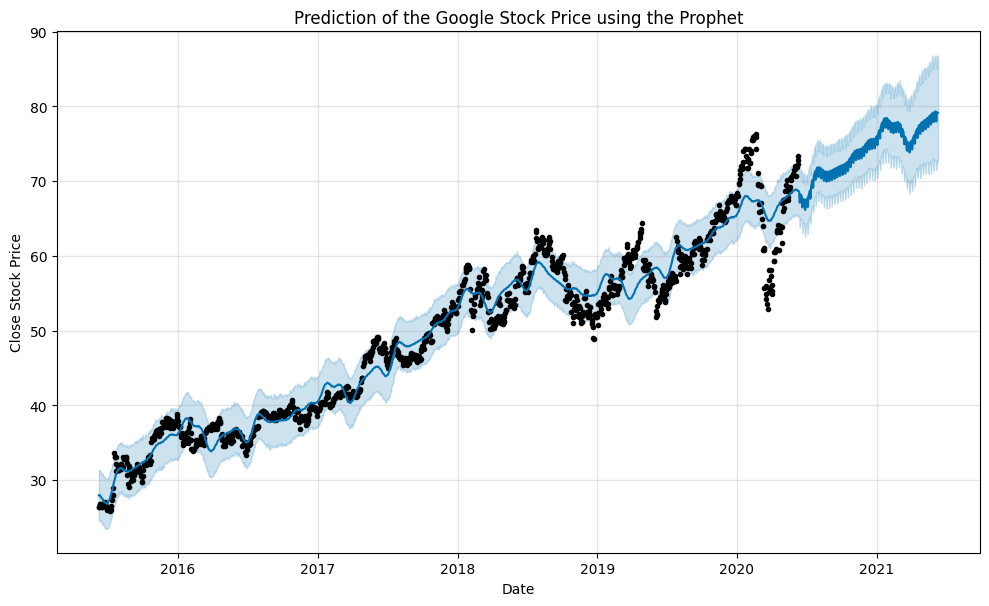

In [37]:
# Create a new Prophet model
m = Prophet()
# Fit the model to your historical data
m.fit(data)
# Create a dataframe for future predictions
future = m.make_future_dataframe(periods=365) # specify the number of days in the future
# Generate predictions for the future dates
prediction = m.predict(future)
# Plot the predicted stock prices
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

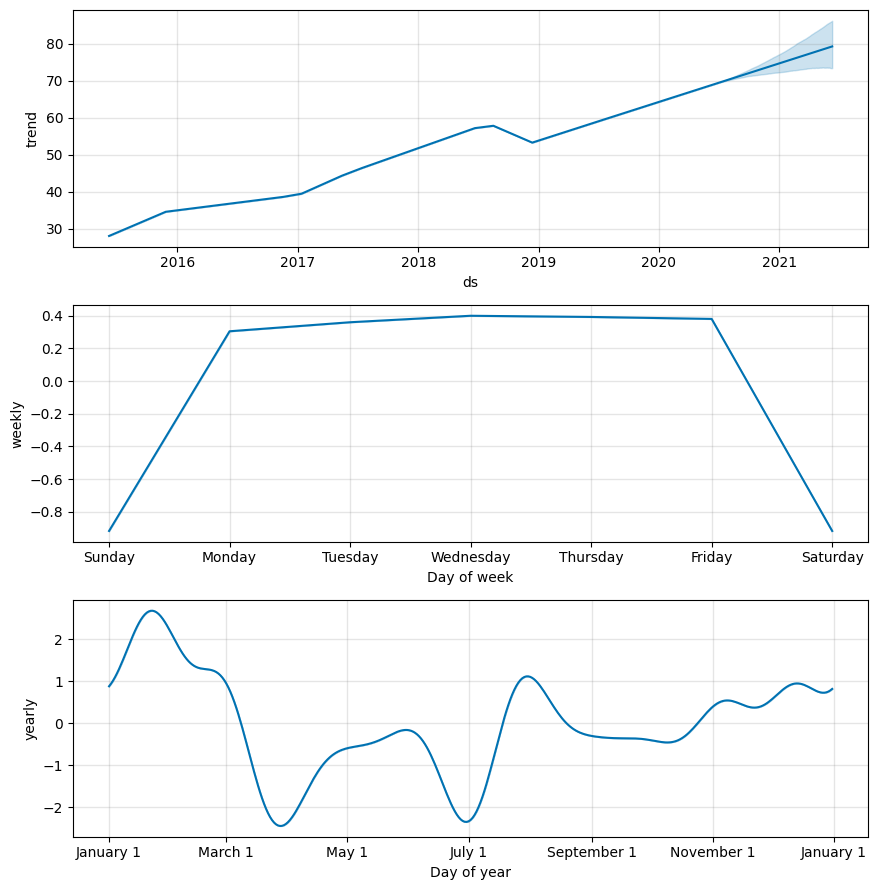

In [38]:
m.plot_components(prediction)
plt.show()
